<center><h1>Data Analysis Pandas</h1></center>

---
- [Introduction to Pandas](#introduction)
  * [What is it?](#what_is_it)
  * [What's it Good For?](#whats_it_good_for)
  * [What are some Weaknesses?](#weaknesses)
  * [What I Can't Cover in 15 Minutes](#out_of_scope)
  * [What are Some Resources](#resources)

- [File IO](#file_io)
  * [Excel](#excel)
  * [CSV](#csv)
  * [From a URL](#from_url)
  * [From an SQL Query](#from_sql_query)

- [Selecting Data](#selecting)

  * [Selecting a Single Column](#selecting_a_single_column)
  
  * [Selecting Multiple Columns](#selecting_multiple_columns)
  
  * [Selecting Using Operators](#selecting_using_operators)
   - [Selecting Using A Comparison Operator](#selecting_using_comparison_operator)
   - [Selecting Using A Multiple Comparison Operators](#selecting_using_multiple_comparison_operators)
   - [selecting Using Inclusion Method](#selecting_using_inclusion_method)
   - [Selecting with .isin()](#selecting_with_isin)
   
  * [Better Selection Methods](#better_selection_methods)
   - [Selecting with .loc](#selecting_with_loc)
   - [selecting with iloc](#selecting_with_iloc)
    <!-- * [selecting rows with missing values] (#selecting_missing_values) -->
  <!-- * [selecting Rows that Contain a String] (#seleting_rows_that_contain_a_string) -->
  <!-- * [selecting rows that match a regular expression](#selecting_rows_that_match_a_regex) -->
  
  * [Selecting Random Samples](#selecting_random_samples)
   - [Selecting a Specific Number](#sampling_by_number)
   - [Selecting a Percentage](#sampling_by_percentage)
   <!--Sample(n=3, random_state=42) sample(frac=0.75, random_state=99)-->

- [Munging Data](#munging)
  * [Using the "inplace" argument](#the_inplace_argument)
  * [Editing the Index](#editing_the_index)
   - [Resetting the Index](#resetting_the_index)
   - [Setting a Column as the Index](#selecting_a_column_as_an_index)
  * [Editing Values](#editing_values)
  * [Replacing Values](#replacing_values)
   - [Converting Values to NAN with Simple .replace()](#replacing_with_replace_method)
   - [Specifying Multiple Replacements at Once](#replacing_with_dict)
   - [Replacing Using Regular Expressions](#replacing_with_regex)
  * [Dropping Columns](#dropping_columns)
  * [Adding Columns](#adding_columns)
  * [Adding Rows](#adding_rows)
  * [Dropping Duplicates](#dropping_duplicates)
  * [Dealing with Missing Data](#missing_data)

- [Analyzing Data](#analysis)
  * [Computation and Descriptive Statistics Methods Table](#computation_descriptive_statistics_table)
  * [Get Some Basic Descriptive Statistics of the Columns](#describe_method)
  * [Get a Table of Correlations Between Columns](#corr_method)
  * [Get the Standard Deviation of a Column](#std_method)
  * [Grouping Data for Analysis](#using_groupby)

- [Plotting Data](#plotting)
  * [Line Graphs](#line_graphs)
  * [Scatter Plots](#scatter_plots)
  * [Bar Charts](#bar_charts)
  * [Histograms](#histograms)
  * [Pie Charts](#pie_charts)
 

---
<a id='introduction'></a>
<center><h2>Introduction</h2></center>

<a id='what_is_it'></a>
<i><h3><a href="pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.">What is Pandas</a></h3></i>

Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
    
<a id='whats_it_good_for'></a>
<i><h3>What's it Good For?</h3></i>
- Saving you from excel!

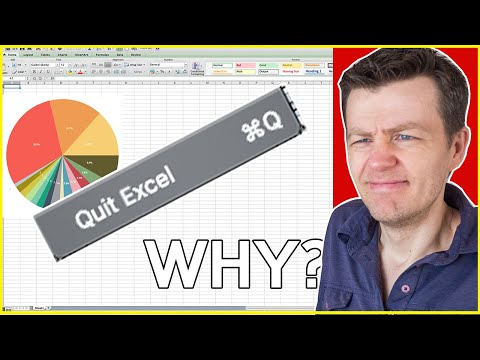

In [119]:
from IPython.display import YouTubeVideo
YouTubeVideo('S8wO4ppE9L8')

- Consolidating all the functionality most people could need in one place
- Reading and writing to a plethora of formats
- Offering speed and memory optimizations over straight Python
- Efficient cleaning/munging of data
- Good functionality for working with missing data
- Plenty of analysis functionality
- Plenty of plotting functionality

<a id='weaknesses'></a>
<i><h3>Weaknesses</h3></i>
- There is a bit of a learning curve
  * The syntax diverges from standard Python sometimes
  * It's massive
- It will be slower and less memory efficient than straight numpy

<a id='out_of_scope'></a>
<i><h3>Stuff I won't Have Time For</h3></i>
- Covering all the ways to do one thing
- Covering all the things you can do with pandas
- All the ways to group data including multi-indexes
- Going too deep into explaining some of the selection methods
- Too much in analysis
- Too much in plotting
- Even some things one might consider _"fundamental"_

<a id='resources'></a>
<i><h3>Resources for Learning</h3></i>

- [**THIS NOTEBOOK!**](https://gitlab.com/patrickmckowen/pandas-presentation)


- **Books**
  * Python for Data Analysis
   - [Book Data and Code Notebooks](https://github.com/wesm/pydata-book)
   
  * Python Data Science Handbook 
   - [Online Book](https://jakevdp.github.io/PythonDataScienceHandbook/)
   - [Code from Book](https://github.com/jakevdp/PythonDataScienceHandbook)
   
  * Hands-On Machine Learning with Scikit-Learn and TensorFlow
   - [Online Book](https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/)
   - [Code from Book](https://github.com/ageron/handson-ml)
   
   
   
- **Youtube Videos**

  * Data School
   - [Data analysis in Python with pandas](https://www.youtube.com/playlist?list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y)
   - [Best practices with pandas](https://www.youtube.com/playlist?list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6)
  
  * sentdex
   - [Data Analysis w/ Python 3 and Pandas](https://www.youtube.com/playlist?list=PLQVvvaa0QuDfSfqQuee6K8opKtZsh7sA9)
   
  * codebasics
   - [Pandas Tutorial (Data Analysis In Python)](https://www.youtube.com/playlist?list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy)

---

#### *Imports*

For those unfamiliar with Jupyter notebooks,
the "%matplotlib inline" line is needed
to display visualizations right in the 
notebook. <br>
_You can also us "notebook" instead of "inline"
but it has to redraw the graph rapidly and can
be slow._

In [120]:
%matplotlib inline
import pandas as pd
import numpy as np

---
<a id='file_io'></a>
<center><h2>File IO</h2></center>

One of Pandas' biggest strengths is it's ability read 
from and write to a ton of formats. 

<a id='excel'></a>
<i><h3>Excel</h3></i>

For instance if you are an excel user, you could get
started right away with:

In [126]:
pokemon = pd.read_excel('./data/pokemon.xlsx')
pokemon

Number        Name   Type_1  Type_2  Total   HP  Attack  Defense  Sp_Atk  \
0         1   Bulbasaur    Grass  Poison    318   45      49       49      65   
1         2     Ivysaur    Grass  Poison    405   60      62       63      80   
2         3    Venusaur    Grass  Poison    525   80      82       83     100   
3         4  Charmander     Fire     NaN    309   39      52       43      60   
4         5  Charmeleon     Fire     NaN    405   58      64       58      80   
..      ...         ...      ...     ...    ...  ...     ...      ...     ...   
716     717     Yveltal     Dark  Flying    680  126     131       95     131   
717     718     Zygarde   Dragon  Ground    600  108     100      121      81   
718     719     Diancie     Rock   Fairy    600   50     100      150     100   
719     720       Hoopa  Psychic   Ghost    600   80     110       60     150   
720     721   Volcanion     Fire   Water    600   80     110      120     130   

     Sp_Def  ...   Color  hasGender  Pr_Male   Egg_Group_1  Egg_Group_2  \
0        65  ...   Green       True    0.875       Monster        Grass   
1        80  ...   Green       True    0.875       Monster        Grass   
2       100  ...   Green       True    0.875       Monster        Grass   
3        50  ...     Red       True    0.875       Monster       Dragon   
4        65  ...     Red       True    0.875       Monster       Dragon   
..      ...  ...     ...        ...      ...           ...          ...   
716      98  ...     Red      False      NaN  Undiscovered          NaN   
717      95  ...   Green      False      NaN  Undiscovered          NaN   
718     150  ...    Pink      False      NaN  Undiscovered          NaN   
719     130  ...  Purple      False      NaN  Undiscovered          NaN   
720      90  ...   Brown      False      NaN  Undiscovered          NaN   

     hasMegaEvolution Height_m Weight_kg  Catch_Rate       Body_Style  
0               False     0.71       6.9          45        quadruped  
1               False     0.99      13.0          45        quadruped  
2                True     2.01     100.0          45        quadruped  
3               False     0.61       8.5          45   bipedal_tailed  
4               False     1.09      19.0          45   bipedal_tailed  
..                ...      ...       ...         ...              ...  
716             False     5.79     203.0          45        two_wings  
717             False     5.00     305.0           3  serpentine_body  
718              True     0.71       8.8           3        head_arms  
719             False     0.51       9.0           3        head_only  
720             False     1.70     195.0           3        quadruped  

[721 rows x 23 columns]

<a id='csv'></a>
<i><h3>CSV</h3></i>

The same can be done for CSV files

In [127]:
vgame_sales = pd.read_csv('./data/video_game_sales.csv')
vgame_sales

Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

          Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  \
0          Nintendo     41.36     28.96      3.77         8.45         82.53   
1          Nintendo     29.08      3.58      6.81         0.77         40.24   
2          Nintendo     15.68     12.76      3.79         3.29         35.52   
3          Nintendo     15.61     10.93      3.28         2.95         32.77   
4          Nintendo     11.27      8.89     10.22         1.00         31.37   
...             ...       ...       ...       ...          ...           ...   
16714    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   
16715   Codemasters      0.00      0.01      0.00         0.00          0.01   
16716  Idea Factory      0.00      0.00      0.01         0.00          0.01   
16717       Wanadoo      0.01      0.00      0.00         0.00          0.01   
16718    Tecmo Koei      0.00      0.00      0.01         0.00          0.01   

       Critic_Score  Critic_Count User_Score  User_Count Developer Rating  
0              76.0          51.0          8       322.0  Nintendo      E  
1               NaN           NaN        NaN         NaN       NaN    NaN  
2              82.0          73.0        8.3       709.0  Nintendo      E  
3              80.0          73.0          8       192.0  Nintendo      E  
4               NaN           NaN        NaN         NaN       NaN    NaN  
...             ...           ...        ...         ...       ...    ...  
16714           NaN           NaN        NaN         NaN       NaN    NaN  
16715           NaN           NaN        NaN         NaN       NaN    NaN  
16716           NaN           NaN        NaN         NaN       NaN    NaN  
16717           NaN           NaN        NaN         NaN       NaN    NaN  
16718           NaN           NaN        NaN         NaN       NaN    NaN  

[16719 rows x 16 columns]

<a id='from_url'></a>
<i><h3>Reading from a URL</h3></i>

Instead of passing a path to a local file, you can pass a url

In [128]:
ufo_sightings = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/ufo.csv")
ufo_sightings

City Colors Reported Shape Reported State  \
0                    Ithaca             NaN       TRIANGLE    NY   
1               Willingboro             NaN          OTHER    NJ   
2                   Holyoke             NaN           OVAL    CO   
3                   Abilene             NaN           DISK    KS   
4      New York Worlds Fair             NaN          LIGHT    NY   
...                     ...             ...            ...   ...   
18236            Grant Park             NaN       TRIANGLE    IL   
18237           Spirit Lake             NaN           DISK    IA   
18238           Eagle River             NaN            NaN    WI   
18239           Eagle River             RED          LIGHT    WI   
18240                  Ybor             NaN           OVAL    FL   

                   Time  
0        6/1/1930 22:00  
1       6/30/1930 20:00  
2       2/15/1931 14:00  
3        6/1/1931 13:00  
4       4/18/1933 19:00  
...                 ...  
18236  12/31/2000 23:00  
18237  12/31/2000 23:00  
18238  12/31/2000 23:45  
18239  12/31/2000 23:45  
18240  12/31/2000 23:59  

[18241 rows x 5 columns]

<a id='from_sql_query'></a>
<i><h3>Create from an SQL Query</h3></i>

You can even build a dataframe from an sql query! <br>
Here I am using sqlite3 but you can also use MySQL, Postgres etc.

In [130]:
import sqlite3

conn = sqlite3.connect('./data/chinook.db')

query = """
SELECT
    trackid,
    tracks.name AS track,
    albums.title AS album,
    artists.name AS artist
FROM
    tracks
    INNER JOIN albums ON albums.albumid = tracks.albumid
    INNER JOIN artists ON artists.artistid = albums.artistid;
"""

# Just pass it your query string and a connection object
chinook = pd.read_sql_query(query, con=conn)

chinook


TrackId                                              track  \
0           1            For Those About To Rock (We Salute You)   
1           6                              Put The Finger On You   
2           7                                    Let's Get It Up   
3           8                                   Inject The Venom   
4           9                                         Snowballed   
...       ...                                                ...   
3498     3499  Pini Di Roma (Pinien Von Rom) \ I Pini Della V...   
3499     3500  String Quartet No. 12 in C Minor, D. 703 "Quar...   
3500     3501               L'orfeo, Act 3, Sinfonia (Orchestra)   
3501     3502  Quintet for Horn, Violin, 2 Violas, and Cello ...   
3502     3503                                      Koyaanisqatsi   

                                                  album  \
0                 For Those About To Rock We Salute You   
1                 For Those About To Rock We Salute You   
2                 For Those About To Rock We Salute You   
3                 For Those About To Rock We Salute You   
4                 For Those About To Rock We Salute You   
...                                                 ...   
3498                             Respighi:Pines of Rome   
3499  Schubert: The Late String Quartets & String Qu...   
3500                                Monteverdi: L'Orfeo   
3501                              Mozart: Chamber Music   
3502  Koyaanisqatsi (Soundtrack from the Motion Pict...   

                                                 artist  
0                                                 AC/DC  
1                                                 AC/DC  
2                                                 AC/DC  
3                                                 AC/DC  
4                                                 AC/DC  
...                                                 ...  
3498                                     Eugene Ormandy  
3499                             Emerson String Quartet  
3500  C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon...  
3501                                      Nash Ensemble  
3502                              Philip Glass Ensemble  

[3503 rows x 4 columns]

<center><h2>Now We're Getting Excited!</h2></center>

![SegmentLocal](static/dancing_pandas.gif "Now We're Getting Excited!")

<br>

I'm going to load one more data frame which I 
generated from a simple python script that recursively walked
my home directory and built a csv file from the data

In [129]:
files = pd.read_csv('./data/file_list.csv')
files

path  \
0                           /home/patrickm/.bash_logout    
1                          /home/patrickm/.ICEauthority    
2                               /home/patrickm/.profile    
3                          /home/patrickm/.bash_history    
4                               /home/patrickm/ack_link    
...                                                  ...   
71521  /home/patrickm/Downloads/tta_2019_thursday/Eng...   
71522  /home/patrickm/Downloads/tta_2019_thursday/Eng...   
71523  /home/patrickm/Downloads/tta_2019_thursday/Eng...   
71524  /home/patrickm/Downloads/tta_2019_thursday/Eng...   
71525  /home/patrickm/Downloads/tta_2019_thursday/Eng...   

                                                    name extension   size  \
0                           /home/patrickm/.bash_logout        NaN    220   
1                          /home/patrickm/.ICEauthority        NaN    942   
2                               /home/patrickm/.profile        NaN    807   
3                          /home/patrickm/.bash_history        NaN  18614   
4                               /home/patrickm/ack_link        NaN     32   
...                                                  ...       ...    ...   
71521   /home/patrickm/Downloads/tta_2019_thursday/En...      .zip   3252   
71522   /home/patrickm/Downloads/tta_2019_thursday/En...      .zip    767   
71523   /home/patrickm/Downloads/tta_2019_thursday/En...      .zip   8687   
71524   /home/patrickm/Downloads/tta_2019_thursday/En...      .zip  34586   
71525   /home/patrickm/Downloads/tta_2019_thursday/En...      .zip   9706   

                                                  sha256  
0       26882b79471c25f945c970f8233d8ce29d54e9d5eedcd...  
1       de2a1e29015efc63ea49a0088967d358fbabe416ff046...  
2       28b4a453b68dde64f814e94bab14ee651f4f162e15dd9...  
3       835b6595b98a8233587794de34b0bb07b052b3f86b135...  
4       e39ae7411f58c0cf8a8fbccbe4275b0c8cbcf8d99b88e...  
...                                                  ...  
71521   30b398f712fc2d6bf9ac9b9dbb095b9a8ae21195cf37b...  
71522   a7989c085f7606bd34904394bc52fbed31e58e98ec516...  
71523   c68228207d332dabe42ecbaba625c448ee3d2793a88f4...  
71524   482c4a753379130f0b1432b3ad79b8c04b01cafa93165...  
71525   7e057d64aa292e78a9fec5710c63225b6cba27b7ba52d...  

[71526 rows x 5 columns]

---
<a id='selecting'></a>
<center><h2>Selecting Subsets of Data</h2></center>

The syntax can seem a little off 
with selection at times but it's
mostl pretty logical and you'll get
used to it quickly.

<a id='selecting_a_single_column'></a>
<i><h3>Selecting a Single Column</h3></i>

This is similar to doing lookups in a dictionary

In [123]:
files['path']

0        /home/patrickm/.local/lib/python3.6/site-packa...
1        /home/patrickm/Desktop/internal_hd_backups/pro...
2        /home/patrickm/Desktop/internal_hd_backups/pro...
3        /home/patrickm/Desktop/internal_hd_backups/pro...
4        /home/patrickm/Desktop/internal_hd_backups/pro...
                               ...                        
71521    /home/patrickm/Desktop/internal_hd_backups/Myt...
71522    /home/patrickm/Downloads/2019-06-20-raspbian-b...
71523    /home/patrickm/Desktop/internal_hd_backups/201...
71524    /home/patrickm/Downloads/2019-06-20-raspbian-b...
71525    /home/patrickm/Downloads/Manjaro-ARM-lxqt-rpi3...
Name: path, Length: 71526, dtype: object


Here we arrive at our first crossroad.<br>
There is another way to access individual
columns and that is as attributes of the
dataframe object.

This is obviously a little shorter to write 
and depending on your column names, this may 
work for you most of the time. 
However, it won't always work.

_**For instance:**_
- what if you **have spaces 
  in your column names**?

**OR**

- what if your **column has the same name 
  as an attribute or method of the Series/dataframe objects**?

In [124]:
files.path

0        /home/patrickm/.local/lib/python3.6/site-packa...
1        /home/patrickm/Desktop/internal_hd_backups/pro...
2        /home/patrickm/Desktop/internal_hd_backups/pro...
3        /home/patrickm/Desktop/internal_hd_backups/pro...
4        /home/patrickm/Desktop/internal_hd_backups/pro...
                               ...                        
71521    /home/patrickm/Desktop/internal_hd_backups/Myt...
71522    /home/patrickm/Downloads/2019-06-20-raspbian-b...
71523    /home/patrickm/Desktop/internal_hd_backups/201...
71524    /home/patrickm/Downloads/2019-06-20-raspbian-b...
71525    /home/patrickm/Downloads/Manjaro-ARM-lxqt-rpi3...
Name: path, Length: 71526, dtype: object

<a id='selecting_multiple_columns'></a>
<i><h3>Selecting Multiple Columns</h3></i>

To return a _dataframe_ of multiple columns,
pass the column names in as a list.

In [15]:
files[['path', 'size']]

path   size
0                           /home/patrickm/.bash_logout     220
1                          /home/patrickm/.ICEauthority     942
2                               /home/patrickm/.profile     807
3                          /home/patrickm/.bash_history   18614
4                               /home/patrickm/ack_link      32
...                                                  ...    ...
71521  /home/patrickm/Downloads/tta_2019_thursday/Eng...   3252
71522  /home/patrickm/Downloads/tta_2019_thursday/Eng...    767
71523  /home/patrickm/Downloads/tta_2019_thursday/Eng...   8687
71524  /home/patrickm/Downloads/tta_2019_thursday/Eng...  34586
71525  /home/patrickm/Downloads/tta_2019_thursday/Eng...   9706

[71526 rows x 2 columns]

Lets sort that...

In [16]:
files.sort_values(by='size')

path  \
48874  /home/patrickm/.local/lib/python3.6/site-packa...   
13250  /home/patrickm/Desktop/internal_hd_backups/pro...   
13244  /home/patrickm/Desktop/internal_hd_backups/pro...   
13238  /home/patrickm/Desktop/internal_hd_backups/pro...   
13232  /home/patrickm/Desktop/internal_hd_backups/pro...   
...                                                  ...   
44325  /home/patrickm/Desktop/internal_hd_backups/Myt...   
52197  /home/patrickm/Downloads/2019-06-20-raspbian-b...   
7739   /home/patrickm/Desktop/internal_hd_backups/201...   
52192  /home/patrickm/Downloads/2019-06-20-raspbian-b...   
52193  /home/patrickm/Downloads/Manjaro-ARM-lxqt-rpi3...   

                                                    name extension  \
48874   /home/patrickm/.local/lib/python3.6/site-pack...       .py   
13250   /home/patrickm/Desktop/internal_hd_backups/pr...       .py   
13244   /home/patrickm/Desktop/internal_hd_backups/pr...       .py   
13238   /home/patrickm/Desktop/internal_hd_backups/pr...       .py   
13232   /home/patrickm/Desktop/internal_hd_backups/pr...       .py   
...                                                  ...       ...   
44325   /home/patrickm/Desktop/internal_hd_backups/My...      .dmg   
52197   /home/patrickm/Downloads/2019-06-20-raspbian-...      .zip   
7739    /home/patrickm/Desktop/internal_hd_backups/20...      .img   
52192   /home/patrickm/Downloads/2019-06-20-raspbian-...      .img   
52193   /home/patrickm/Downloads/Manjaro-ARM-lxqt-rpi...      .img   

             size                                             sha256  
48874           0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...  
13250           0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...  
13244           0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...  
13238           0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...  
13232           0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...  
...           ...                                                ...  
44325   883857283   be9ca7090239eaa6246df7a4c1a5f352d89baa578b0ab...  
52197  1149027370   49a6b840ec2cb3e220f9a02bbceed91d21d20a7eeaac3...  
7739   1389363200   eccf4589963dba463ef547f8a82b519a7f7751db1fb04...  
52192  3774873600   049767a3abeff04d4f4386474da0f3b0e9fe5d84e849f...  
52193  4233101312   b058c6f6086b4ac8e481abc1f9c9b6126eaede8ce9df6...  

[71526 rows x 5 columns]

... but notice that did not change the dataframe. <br>
We'll get back to this later.

In [17]:
files

path  \
0                           /home/patrickm/.bash_logout    
1                          /home/patrickm/.ICEauthority    
2                               /home/patrickm/.profile    
3                          /home/patrickm/.bash_history    
4                               /home/patrickm/ack_link    
...                                                  ...   
71521  /home/patrickm/Downloads/tta_2019_thursday/Eng...   
71522  /home/patrickm/Downloads/tta_2019_thursday/Eng...   
71523  /home/patrickm/Downloads/tta_2019_thursday/Eng...   
71524  /home/patrickm/Downloads/tta_2019_thursday/Eng...   
71525  /home/patrickm/Downloads/tta_2019_thursday/Eng...   

                                                    name extension   size  \
0                           /home/patrickm/.bash_logout        NaN    220   
1                          /home/patrickm/.ICEauthority        NaN    942   
2                               /home/patrickm/.profile        NaN    807   
3                          /home/patrickm/.bash_history        NaN  18614   
4                               /home/patrickm/ack_link        NaN     32   
...                                                  ...       ...    ...   
71521   /home/patrickm/Downloads/tta_2019_thursday/En...      .zip   3252   
71522   /home/patrickm/Downloads/tta_2019_thursday/En...      .zip    767   
71523   /home/patrickm/Downloads/tta_2019_thursday/En...      .zip   8687   
71524   /home/patrickm/Downloads/tta_2019_thursday/En...      .zip  34586   
71525   /home/patrickm/Downloads/tta_2019_thursday/En...      .zip   9706   

                                                  sha256  
0       26882b79471c25f945c970f8233d8ce29d54e9d5eedcd...  
1       de2a1e29015efc63ea49a0088967d358fbabe416ff046...  
2       28b4a453b68dde64f814e94bab14ee651f4f162e15dd9...  
3       835b6595b98a8233587794de34b0bb07b052b3f86b135...  
4       e39ae7411f58c0cf8a8fbccbe4275b0c8cbcf8d99b88e...  
...                                                  ...  
71521   30b398f712fc2d6bf9ac9b9dbb095b9a8ae21195cf37b...  
71522   a7989c085f7606bd34904394bc52fbed31e58e98ec516...  
71523   c68228207d332dabe42ecbaba625c448ee3d2793a88f4...  
71524   482c4a753379130f0b1432b3ad79b8c04b01cafa93165...  
71525   7e057d64aa292e78a9fec5710c63225b6cba27b7ba52d...  

[71526 rows x 5 columns]

<a id='selecting_using_operators'></a>
- ### <i>Selecting Using Operators</i>

<a id='selecting_using_comparison_operator'></a>
#### Selecting Using <u>Comparison Operators</u>

Note that the format here...
```python
files['size'] > 25000
```
will return a series of True or false values.
In order to fetch the actual rows, you need to 
put it inside another df lookup.

In [18]:
files[files['size'] > 25000]

path  \
8                               /home/patrickm/.viminfo    
14     /home/patrickm/Pictures/Camera Roll/WIN_201707...   
15     /home/patrickm/Pictures/Camera Roll/WIN_201707...   
16     /home/patrickm/Pictures/Camera Roll/WIN_201707...   
17     /home/patrickm/Pictures/Camera Roll/WIN_201707...   
...                                                  ...   
71506  /home/patrickm/Downloads/tta_2019_thursday/Eng...   
71515  /home/patrickm/Downloads/tta_2019_thursday/Eng...   
71517  /home/patrickm/Downloads/tta_2019_thursday/Eng...   
71520  /home/patrickm/Downloads/tta_2019_thursday/Eng...   
71524  /home/patrickm/Downloads/tta_2019_thursday/Eng...   

                                                    name extension     size  \
8                               /home/patrickm/.viminfo        NaN    28836   
14      /home/patrickm/Pictures/Camera Roll/WIN_20170...      .jpg    39276   
15      /home/patrickm/Pictures/Camera Roll/WIN_20170...      .jpg    49725   
16      /home/patrickm/Pictures/Camera Roll/WIN_20170...      .jpg    42095   
17      /home/patrickm/Pictures/Camera Roll/WIN_20170...      .jpg    57550   
...                                                  ...       ...      ...   
71506   /home/patrickm/Downloads/tta_2019_thursday/En...      .zip    34586   
71515   /home/patrickm/Downloads/tta_2019_thursday/En...      .zip  1085072   
71517   /home/patrickm/Downloads/tta_2019_thursday/En...      .zip    27720   
71520   /home/patrickm/Downloads/tta_2019_thursday/En...      .zip    25781   
71524   /home/patrickm/Downloads/tta_2019_thursday/En...      .zip    34586   

                                                  sha256  
8       e2206bcb2ccf564ec3698b456d35ee8073658e264e11e...  
14      2753dbb57d6e4154a88a06c49557dd2b4e0b869b59e3f...  
15      1d50feb58dd31a52a91996f6957d375c1c4faf2115af1...  
16      ba7dabc41f4cd63de85a39c6a34d70d4467ade3533971...  
17      d3f9c6c2eefe8735fb7d7b40d557f665b4a557936c804...  
...                                                  ...  
71506   482c4a753379130f0b1432b3ad79b8c04b01cafa93165...  
71515   58ab67b1c554576000141eb8bdab5e6d2192cacea35f2...  
71517   14406aadabeef3e9639026f9656a854e86313e67b1199...  
71520   e514e969e17be16f2a648c698ce02be82078e82f8f4cf...  
71524   482c4a753379130f0b1432b3ad79b8c04b01cafa93165...  

[9767 rows x 5 columns]

<a id='selecting_using_multiple_comparison_operators'></a>
#### Selecting Using <u>Multiple Comparison Operators</u>

Once again, there are some important things to note...

1. You have place each comparison in (parentheses)

<b>This WILL NOT work</b>
```python
files[files['size'] > 25000 | files['extension'] == '.jpg']
```

2. For technical reasons you CANNOT USE *and* or *or*

<b>This also WILL NOT work</b>
```python
files[(files['size'] > 25000) and (files['extension'] == '.jpg')]
```

In [132]:
files[(files['size'] > 25000) | (files['extension'] == '.jpg')]

path  \
8                               /home/patrickm/.viminfo    
14     /home/patrickm/Pictures/Camera Roll/WIN_201707...   
15     /home/patrickm/Pictures/Camera Roll/WIN_201707...   
16     /home/patrickm/Pictures/Camera Roll/WIN_201707...   
17     /home/patrickm/Pictures/Camera Roll/WIN_201707...   
...                                                  ...   
71506  /home/patrickm/Downloads/tta_2019_thursday/Eng...   
71515  /home/patrickm/Downloads/tta_2019_thursday/Eng...   
71517  /home/patrickm/Downloads/tta_2019_thursday/Eng...   
71520  /home/patrickm/Downloads/tta_2019_thursday/Eng...   
71524  /home/patrickm/Downloads/tta_2019_thursday/Eng...   

                                                    name extension     size  \
8                               /home/patrickm/.viminfo        NaN    28836   
14      /home/patrickm/Pictures/Camera Roll/WIN_20170...      .jpg    39276   
15      /home/patrickm/Pictures/Camera Roll/WIN_20170...      .jpg    49725   
16      /home/patrickm/Pictures/Camera Roll/WIN_20170...      .jpg    42095   
17      /home/patrickm/Pictures/Camera Roll/WIN_20170...      .jpg    57550   
...                                                  ...       ...      ...   
71506   /home/patrickm/Downloads/tta_2019_thursday/En...      .zip    34586   
71515   /home/patrickm/Downloads/tta_2019_thursday/En...      .zip  1085072   
71517   /home/patrickm/Downloads/tta_2019_thursday/En...      .zip    27720   
71520   /home/patrickm/Downloads/tta_2019_thursday/En...      .zip    25781   
71524   /home/patrickm/Downloads/tta_2019_thursday/En...      .zip    34586   

                                                  sha256  
8       e2206bcb2ccf564ec3698b456d35ee8073658e264e11e...  
14      2753dbb57d6e4154a88a06c49557dd2b4e0b869b59e3f...  
15      1d50feb58dd31a52a91996f6957d375c1c4faf2115af1...  
16      ba7dabc41f4cd63de85a39c6a34d70d4467ade3533971...  
17      d3f9c6c2eefe8735fb7d7b40d557f665b4a557936c804...  
...                                                  ...  
71506   482c4a753379130f0b1432b3ad79b8c04b01cafa93165...  
71515   58ab67b1c554576000141eb8bdab5e6d2192cacea35f2...  
71517   14406aadabeef3e9639026f9656a854e86313e67b1199...  
71520   e514e969e17be16f2a648c698ce02be82078e82f8f4cf...  
71524   482c4a753379130f0b1432b3ad79b8c04b01cafa93165...  

[9781 rows x 5 columns]

<a id='selecting_using_inclusion_method'></a>
#### Selecting Using <u>Inclusion Operator</u> ... <i>I mean inclussion method</i>

You an chain these together all day but there's 
almost always a better way in Pandas.


For insance, if you want to select rows 
of picture files you might do.

```python
files[(files['extension'] == '.jpg') | (files['extension'] == '.jpeg') | (files['extension'] == '.png')]
```

<br>

<b><center>but...</center></b>

<br>

![](raymondhettinger.jpg)

In [134]:
files[files['extension'].isin(['.jpg', '.jpeg', '.png'])]

path  \
14     /home/patrickm/Pictures/Camera Roll/WIN_201707...   
15     /home/patrickm/Pictures/Camera Roll/WIN_201707...   
16     /home/patrickm/Pictures/Camera Roll/WIN_201707...   
17     /home/patrickm/Pictures/Camera Roll/WIN_201707...   
18     /home/patrickm/Pictures/Camera Roll/WIN_201707...   
...                                                  ...   
70160  /home/patrickm/Downloads/julia/doc/images/trav...   
70161  /home/patrickm/Downloads/julia/doc/images/gith...   
70276  /home/patrickm/Downloads/julia/doc/_build/html...   
70391  /home/patrickm/Downloads/julia/doc/src/assets/...   
70954  /home/patrickm/Downloads/julia/stdlib/Pkg-394e...   

                                                    name extension    size  \
14      /home/patrickm/Pictures/Camera Roll/WIN_20170...      .jpg   39276   
15      /home/patrickm/Pictures/Camera Roll/WIN_20170...      .jpg   49725   
16      /home/patrickm/Pictures/Camera Roll/WIN_20170...      .jpg   42095   
17      /home/patrickm/Pictures/Camera Roll/WIN_20170...      .jpg   57550   
18      /home/patrickm/Pictures/Camera Roll/WIN_20170...      .jpg   56831   
...                                                  ...       ...     ...   
70160   /home/patrickm/Downloads/julia/doc/images/tra...      .png     685   
70161   /home/patrickm/Downloads/julia/doc/images/git...      .png   65572   
70276   /home/patrickm/Downloads/julia/doc/_build/htm...      .png   12311   
70391   /home/patrickm/Downloads/julia/doc/src/assets...      .png   12311   
70954   /home/patrickm/Downloads/julia/stdlib/Pkg-394...      .png  133246   

                                                  sha256  
14      2753dbb57d6e4154a88a06c49557dd2b4e0b869b59e3f...  
15      1d50feb58dd31a52a91996f6957d375c1c4faf2115af1...  
16      ba7dabc41f4cd63de85a39c6a34d70d4467ade3533971...  
17      d3f9c6c2eefe8735fb7d7b40d557f665b4a557936c804...  
18      47c4d4911364af8250edc44dc6d6f53d2db9494d0bfcb...  
...                                                  ...  
70160   5b8c41a42a28cb2b2bf94dfc8acb45ed7acc42b59d03e...  
70161   dd78b3a059fd1350a23d72b60c0602042af45fdff64cd...  
70276   b3d5da37c0643698a590956ed6ceefc93334f09eb7f9a...  
70391   b3d5da37c0643698a590956ed6ceefc93334f09eb7f9a...  
70954   cc785f2d3251ff7cb01e791809adc047667ef62dcfc88...  

[1245 rows x 5 columns]

<a id='selecting_using_loc'></a>
### Better Selecting Methods

So far we have been selecting data 
using somewhat of a shorthand.

We've been doing this:
```python
pokemon[['Type_1', 'Type_2']]
```
and you will also see thi:
Essentially you want to avoid this:
```python
df['score'][df['age'] > 10] = 0
```

The issues caused by these include:
- Ambiguity to the reader
- Inconsistent behavior
- Especially for the second one we can 
  run into problems where we end up trying 
  to modify a copy of the dataframe.
- The "index chaining that is happening in
  the second example is actually two 
  separate processes which do do bad things
  to performance, and wreak having when
  dealing with multi-indexes.

Basically we want to favcor the more 
explicit alternatives.
-.loc
-.iloc
-.at
-.iat

I encourage you to look into
[the problems with method chaining](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-part-4-c4216f84d388)


<a id='selecting_using_loc'></a>
#### Selecting Using <u>.loc</u>

.loc is used to select data _by labels_
and follows this format:
```python
df.loc[row_selection, column_selection]
```

for both parts we can use 
lists, ranges, and "boolean indexing"
just as we have been doing already

*Let's get the track number, track name and album name where the artists is AC/DC*

In [144]:
# First a refresher
chinook

TrackId                                              track  \
0           1            For Those About To Rock (We Salute You)   
1           6                              Put The Finger On You   
2           7                                    Let's Get It Up   
3           8                                   Inject The Venom   
4           9                                         Snowballed   
...       ...                                                ...   
3498     3499  Pini Di Roma (Pinien Von Rom) \ I Pini Della V...   
3499     3500  String Quartet No. 12 in C Minor, D. 703 "Quar...   
3500     3501               L'orfeo, Act 3, Sinfonia (Orchestra)   
3501     3502  Quintet for Horn, Violin, 2 Violas, and Cello ...   
3502     3503                                      Koyaanisqatsi   

                                                  album  \
0                 For Those About To Rock We Salute You   
1                 For Those About To Rock We Salute You   
2                 For Those About To Rock We Salute You   
3                 For Those About To Rock We Salute You   
4                 For Those About To Rock We Salute You   
...                                                 ...   
3498                             Respighi:Pines of Rome   
3499  Schubert: The Late String Quartets & String Qu...   
3500                                Monteverdi: L'Orfeo   
3501                              Mozart: Chamber Music   
3502  Koyaanisqatsi (Soundtrack from the Motion Pict...   

                                                 artist  
0                                                 AC/DC  
1                                                 AC/DC  
2                                                 AC/DC  
3                                                 AC/DC  
4                                                 AC/DC  
...                                                 ...  
3498                                     Eugene Ormandy  
3499                             Emerson String Quartet  
3500  C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon...  
3501                                      Nash Ensemble  
3502                              Philip Glass Ensemble  

[3503 rows x 4 columns]

In [150]:
chinook.loc[chinook.loc[:, 'artist'] == 'AC/DC', ['TrackId', 'track', 'album']]

TrackId                                    track  \
0         1  For Those About To Rock (We Salute You)   
1         6                    Put The Finger On You   
2         7                          Let's Get It Up   
3         8                         Inject The Venom   
4         9                               Snowballed   
5        10                               Evil Walks   
6        11                                   C.O.D.   
7        12                       Breaking The Rules   
8        13                 Night Of The Long Knives   
9        14                               Spellbound   
14       15                                  Go Down   
15       16                              Dog Eat Dog   
16       17                        Let There Be Rock   
17       18                           Bad Boy Boogie   
18       19                            Problem Child   
19       20                                 Overdose   
20       21             Hell Ain't A Bad Place To Be   
21       22                        Whole Lotta Rosie   

                                    album  
0   For Those About To Rock We Salute You  
1   For Those About To Rock We Salute You  
2   For Those About To Rock We Salute You  
3   For Those About To Rock We Salute You  
4   For Those About To Rock We Salute You  
5   For Those About To Rock We Salute You  
6   For Those About To Rock We Salute You  
7   For Those About To Rock We Salute You  
8   For Those About To Rock We Salute You  
9   For Those About To Rock We Salute You  
14                      Let There Be Rock  
15                      Let There Be Rock  
16                      Let There Be Rock  
17                      Let There Be Rock  
18                      Let There Be Rock  
19                      Let There Be Rock  
20                      Let There Be Rock  
21                      Let There Be Rock

A little more comlicated but not 
much more than before

Now hang on to your seats
and tr to remain calm... 

In [152]:
pokemon.loc[:5, 'Type_1']

0    Grass
1    Grass
2    Grass
3     Fire
4     Fire
5     Fire
Name: Type_1, dtype: object

<center><h2>I know What You are Thinking...</h2></center>

![SegmentLocal](static/panda_truck.gif "I know What You are Thinking")
<center><h4>But things will get better</h4></center>
<br>

Yes the label-based indexing method .loc
is inclusive at the end...

so it selects up to **AND INCLUDING** the 
5th row _(and the Type_1 columns)_

and indeed it is doing it **even though 
we are giving it a number.**<br>

The reason is because it is **lo
oking at 
the index essentially as text** which makes 
sense to be inclusive.

Let's skip ahead a bit and modify the df's index
so it uses the pokemon's names

In [ ]:
pokemon.set_index('Name', inplace=True)

In [162]:
pokemon.head()

Number Type_1  Type_2  Total  HP  Attack  Defense  Sp_Atk  Sp_Def  \
Name                                                                            
Bulbasaur        1  Grass  Poison    318  45      49       49      65      65   
Ivysaur          2  Grass  Poison    405  60      62       63      80      80   
Venusaur         3  Grass  Poison    525  80      82       83     100     100   
Charmander       4   Fire     NaN    309  39      52       43      60      50   
Charmeleon       5   Fire     NaN    405  58      64       58      80      65   

            Speed  ...  Color  hasGender Pr_Male  Egg_Group_1  Egg_Group_2  \
Name               ...                                                       
Bulbasaur      45  ...  Green       True   0.875      Monster        Grass   
Ivysaur        60  ...  Green       True   0.875      Monster        Grass   
Venusaur       80  ...  Green       True   0.875      Monster        Grass   
Charmander     65  ...    Red       True   0.875      Monster       Dragon   
Charmeleon     80  ...    Red       True   0.875      Monster       Dragon   

           hasMegaEvolution Height_m  Weight_kg  Catch_Rate      Body_Style  
Name                                                                         
Bulbasaur             False     0.71        6.9          45       quadruped  
Ivysaur               False     0.99       13.0          45       quadruped  
Venusaur               True     2.01      100.0          45       quadruped  
Charmander            False     0.61        8.5          45  bipedal_tailed  
Charmeleon            False     1.09       19.0          45  bipedal_tailed  

[5 rows x 22 columns]

now this might seem a little more logical

*Let's get the primary type Bulbasaur through
Charmelion*

In [164]:
pokemon.loc['Bulbasaur':'Charmeleon', 'Type_1']

Name
Bulbasaur     Grass
Ivysaur       Grass
Venusaur      Grass
Charmander     Fire
Charmeleon     Fire
Name: Type_1, dtype: object

<a id='selecting_using_iloc'></a>
#### Selecting Using <u>.loc</u>

Good news!

.iloc acts like normal python indexing!

In [171]:
ufo_sightings.iloc[:5, :2]

City Colors Reported
0                Ithaca             NaN
1           Willingboro             NaN
2               Holyoke             NaN
3               Abilene             NaN
4  New York Worlds Fair             NaN

<center><h3>See now that's not so bad after all!!!</h3></center>
<br>
<br>
<br>
<br>

<img height=250 width=250 src="static/wtf_panda.jpg">

<!-- <a id='sampling_specific_number'></a>
- ### <i>Taking n Ramdom Samples</i>

<a id='sampling_with_fraction'></a>
#### Selecting Using <u>Comparison Operators</u>  -->

---
<a id='munging'></a>
<center><h2>"Munging" Your Data</h2></center>

<a id='the_inplace_argument'></a>
<i><h3>The "inplace" Argument</h3></i>

Let's go back and sort by values again but
permanently this time.

In [172]:
files.sort_values(by='size', inplace=True)
files

path  \
48874  /home/patrickm/.local/lib/python3.6/site-packa...   
13250  /home/patrickm/Desktop/internal_hd_backups/pro...   
13244  /home/patrickm/Desktop/internal_hd_backups/pro...   
13238  /home/patrickm/Desktop/internal_hd_backups/pro...   
13232  /home/patrickm/Desktop/internal_hd_backups/pro...   
...                                                  ...   
44325  /home/patrickm/Desktop/internal_hd_backups/Myt...   
52197  /home/patrickm/Downloads/2019-06-20-raspbian-b...   
7739   /home/patrickm/Desktop/internal_hd_backups/201...   
52192  /home/patrickm/Downloads/2019-06-20-raspbian-b...   
52193  /home/patrickm/Downloads/Manjaro-ARM-lxqt-rpi3...   

                                                    name extension  \
48874   /home/patrickm/.local/lib/python3.6/site-pack...       .py   
13250   /home/patrickm/Desktop/internal_hd_backups/pr...       .py   
13244   /home/patrickm/Desktop/internal_hd_backups/pr...       .py   
13238   /home/patrickm/Desktop/internal_hd_backups/pr...       .py   
13232   /home/patrickm/Desktop/internal_hd_backups/pr...       .py   
...                                                  ...       ...   
44325   /home/patrickm/Desktop/internal_hd_backups/My...      .dmg   
52197   /home/patrickm/Downloads/2019-06-20-raspbian-...      .zip   
7739    /home/patrickm/Desktop/internal_hd_backups/20...      .img   
52192   /home/patrickm/Downloads/2019-06-20-raspbian-...      .img   
52193   /home/patrickm/Downloads/Manjaro-ARM-lxqt-rpi...      .img   

             size                                             sha256  
48874           0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...  
13250           0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...  
13244           0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...  
13238           0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...  
13232           0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...  
...           ...                                                ...  
44325   883857283   be9ca7090239eaa6246df7a4c1a5f352d89baa578b0ab...  
52197  1149027370   49a6b840ec2cb3e220f9a02bbceed91d21d20a7eeaac3...  
7739   1389363200   eccf4589963dba463ef547f8a82b519a7f7751db1fb04...  
52192  3774873600   049767a3abeff04d4f4386474da0f3b0e9fe5d84e849f...  
52193  4233101312   b058c6f6086b4ac8e481abc1f9c9b6126eaede8ce9df6...  

[71526 rows x 5 columns]

<a id='editing_the_index'></a>
- ### <i>Editing the Index</i>

<a id='resetting_the_index'></a>
#### Selecting Using <u>Resetting the Index</u>

Let's go ahead and [reset the index as well](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)

Again we are using "inplace" <br>
and we have to specify "drop=True"
to drop the old index or it will 
become a column.

In [22]:
files.reset_index(inplace=True, drop=True)
files

path  \
0      /home/patrickm/.local/lib/python3.6/site-packa...   
1      /home/patrickm/Desktop/internal_hd_backups/pro...   
2      /home/patrickm/Desktop/internal_hd_backups/pro...   
3      /home/patrickm/Desktop/internal_hd_backups/pro...   
4      /home/patrickm/Desktop/internal_hd_backups/pro...   
...                                                  ...   
71521  /home/patrickm/Desktop/internal_hd_backups/Myt...   
71522  /home/patrickm/Downloads/2019-06-20-raspbian-b...   
71523  /home/patrickm/Desktop/internal_hd_backups/201...   
71524  /home/patrickm/Downloads/2019-06-20-raspbian-b...   
71525  /home/patrickm/Downloads/Manjaro-ARM-lxqt-rpi3...   

                                                    name extension  \
0       /home/patrickm/.local/lib/python3.6/site-pack...       .py   
1       /home/patrickm/Desktop/internal_hd_backups/pr...       .py   
2       /home/patrickm/Desktop/internal_hd_backups/pr...       .py   
3       /home/patrickm/Desktop/internal_hd_backups/pr...       .py   
4       /home/patrickm/Desktop/internal_hd_backups/pr...       .py   
...                                                  ...       ...   
71521   /home/patrickm/Desktop/internal_hd_backups/My...      .dmg   
71522   /home/patrickm/Downloads/2019-06-20-raspbian-...      .zip   
71523   /home/patrickm/Desktop/internal_hd_backups/20...      .img   
71524   /home/patrickm/Downloads/2019-06-20-raspbian-...      .img   
71525   /home/patrickm/Downloads/Manjaro-ARM-lxqt-rpi...      .img   

             size                                             sha256  
0               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...  
1               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...  
2               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...  
3               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...  
4               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...  
...           ...                                                ...  
71521   883857283   be9ca7090239eaa6246df7a4c1a5f352d89baa578b0ab...  
71522  1149027370   49a6b840ec2cb3e220f9a02bbceed91d21d20a7eeaac3...  
71523  1389363200   eccf4589963dba463ef547f8a82b519a7f7751db1fb04...  
71524  3774873600   049767a3abeff04d4f4386474da0f3b0e9fe5d84e849f...  
71525  4233101312   b058c6f6086b4ac8e481abc1f9c9b6126eaede8ce9df6...  

[71526 rows x 5 columns]

<a id='selecting_a_column_as_an_index'></a>
<i><h3>Selecting a Column to Be an Index</h3></i>

There may already be an index from the file
or one of the columns may logically serve as the index.<br>

For instance the pokemon's number would be an obvious choice.

In [ ]:
pokemon.set_index('Number', inplace=True)

<a id='editing_values'></a>
<i><h3>Editing the Values</h3></i>

*I don't think we need the period 
in the file extension column.*

In [57]:
files['extension'].replace('^\.', '', regex=True, inplace=True)
files

path extension  \
0      /home/patrickm/.local/lib/python3.6/site-packa...        py   
1      /home/patrickm/Desktop/internal_hd_backups/pro...        py   
2      /home/patrickm/Desktop/internal_hd_backups/pro...        py   
3      /home/patrickm/Desktop/internal_hd_backups/pro...        py   
4      /home/patrickm/Desktop/internal_hd_backups/pro...        py   
...                                                  ...       ...   
71521  /home/patrickm/Desktop/internal_hd_backups/Myt...       dmg   
71522  /home/patrickm/Downloads/2019-06-20-raspbian-b...       zip   
71523  /home/patrickm/Desktop/internal_hd_backups/201...       img   
71524  /home/patrickm/Downloads/2019-06-20-raspbian-b...       img   
71525  /home/patrickm/Downloads/Manjaro-ARM-lxqt-rpi3...       img   

             size                                             sha256  \
0               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...   
1               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...   
2               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...   
3               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...   
4               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...   
...           ...                                                ...   
71521   883857283   be9ca7090239eaa6246df7a4c1a5f352d89baa578b0ab...   
71522  1149027370   49a6b840ec2cb3e220f9a02bbceed91d21d20a7eeaac3...   
71523  1389363200   eccf4589963dba463ef547f8a82b519a7f7751db1fb04...   
71524  3774873600   049767a3abeff04d4f4386474da0f3b0e9fe5d84e849f...   
71525  4233101312   b058c6f6086b4ac8e481abc1f9c9b6126eaede8ce9df6...   

        size_in_mb  
0         0.000000  
1         0.000000  
2         0.000000  
3         0.000000  
4         0.000000  
...            ...  
71521   883.857283  
71522  1149.027370  
71523  1389.363200  
71524  3774.873600  
71525  4233.101312  

[71526 rows x 5 columns]

<a id='replacing_values'></a>
<i><h3><a href="http://queirozf.com/entries/pandas-dataframe-replace-examples">Relacing Values</a></h3></i>

<a id='replacing_with_replace_method'></a>
<i><h3>Replacing a Value Completely with the .replace() Method</h3></i>

You can also use the .replace() method 
to completely change the values to something else.

*Perhaps I would rath have a NAN value 
instead of OTHER in the UFO's "Shape_Reported" column*

First let's look at it again

In [61]:
ufo_sightings.head()

City Colors Reported Shape Reported State             Time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00

In [67]:
(ufo_sightings['Shape Reported']
 .replace('OTHER', np.nan, inplace=True))

ufo_sightings.head()

City Colors Reported Shape Reported State             Time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN            NaN    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00

<a id='replacing_with_dict'></a>
<i><h3>Replacing Multiple Values at Once</h3></i>


In [109]:
# Let's refresh ourselves on what 
# the df looks like
chinook

TrackId                                              track  \
0           1            For Those About To Rock (We Salute You)   
1           6                              Put The Finger On You   
2           7                                    Let's Get It Up   
3           8                                   Inject The Venom   
4           9                                         Snowballed   
...       ...                                                ...   
3498     3499  Pini Di Roma (Pinien Von Rom) \ I Pini Della V...   
3499     3500                                Some Symphony Album   
3500     3501               L'orfeo, Act 3, Sinfonia (Orchestra)   
3501     3502  Quintet for Horn, Violin, 2 Violas, and Cello ...   
3502     3503                                      Koyaanisqatsi   

                                                  album  \
0                 For Those About To Rock We Salute You   
1                 For Those About To Rock We Salute You   
2                 For Those About To Rock We Salute You   
3                 For Those About To Rock We Salute You   
4                 For Those About To Rock We Salute You   
...                                                 ...   
3498                             Respighi:Pines of Rome   
3499  Schubert: The Late String Quartets & String Qu...   
3500                                Monteverdi: L'Orfeo   
3501                              Mozart: Chamber Music   
3502  Koyaanisqatsi (Soundtrack from the Motion Pict...   

                                                 artist  
0                                                 AC/DC  
1                                                 AC/DC  
2                                                 AC/DC  
3                                                 AC/DC  
4                                                 AC/DC  
...                                                 ...  
3498                                     Eugene Ormandy  
3499                             Emerson String Quartet  
3500  C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon...  
3501                                      Nash Ensemble  
3502                              Philip Glass Ensemble  

[3503 rows x 4 columns]

In [82]:
chinook.replace(
    {'artist':{
        'AC/DC':'An Awesome Group', 
        'Yehudi Menuhin': "Who?"},
     'album': {
        'For Those About To Rock We Salute You': 'Awesome',
        'Let There Be Rock' : 'Also Awesome'}
    }
)

TrackId                                              track  \
0           1            For Those About To Rock (We Salute You)   
1           6                              Put The Finger On You   
2           7                                    Let's Get It Up   
3           8                                   Inject The Venom   
4           9                                         Snowballed   
...       ...                                                ...   
3498     3499  Pini Di Roma (Pinien Von Rom) \ I Pini Della V...   
3499     3500  String Quartet No. 12 in C Minor, D. 703 "Quar...   
3500     3501               L'orfeo, Act 3, Sinfonia (Orchestra)   
3501     3502  Quintet for Horn, Violin, 2 Violas, and Cello ...   
3502     3503                                      Koyaanisqatsi   

                                                  album  \
0                                               Awesome   
1                                               Awesome   
2                                               Awesome   
3                                               Awesome   
4                                               Awesome   
...                                                 ...   
3498                             Respighi:Pines of Rome   
3499  Schubert: The Late String Quartets & String Qu...   
3500                                Monteverdi: L'Orfeo   
3501                              Mozart: Chamber Music   
3502  Koyaanisqatsi (Soundtrack from the Motion Pict...   

                                                 artist  
0                                      An Awesome Group  
1                                      An Awesome Group  
2                                      An Awesome Group  
3                                      An Awesome Group  
4                                      An Awesome Group  
...                                                 ...  
3498                                     Eugene Ormandy  
3499                             Emerson String Quartet  
3500  C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon...  
3501                                      Nash Ensemble  
3502                              Philip Glass Ensemble  

[3503 rows x 4 columns]

In [83]:
# Just pass it your query string and a connection object
chinook = pd.read_sql_query(query, con=conn)

chinook

TrackId                                              track  \
0           1            For Those About To Rock (We Salute You)   
1           6                              Put The Finger On You   
2           7                                    Let's Get It Up   
3           8                                   Inject The Venom   
4           9                                         Snowballed   
...       ...                                                ...   
3498     3499  Pini Di Roma (Pinien Von Rom) \ I Pini Della V...   
3499     3500  String Quartet No. 12 in C Minor, D. 703 "Quar...   
3500     3501               L'orfeo, Act 3, Sinfonia (Orchestra)   
3501     3502  Quintet for Horn, Violin, 2 Violas, and Cello ...   
3502     3503                                      Koyaanisqatsi   

                                                  album  \
0                 For Those About To Rock We Salute You   
1                 For Those About To Rock We Salute You   
2                 For Those About To Rock We Salute You   
3                 For Those About To Rock We Salute You   
4                 For Those About To Rock We Salute You   
...                                                 ...   
3498                             Respighi:Pines of Rome   
3499  Schubert: The Late String Quartets & String Qu...   
3500                                Monteverdi: L'Orfeo   
3501                              Mozart: Chamber Music   
3502  Koyaanisqatsi (Soundtrack from the Motion Pict...   

                                                 artist  
0                                                 AC/DC  
1                                                 AC/DC  
2                                                 AC/DC  
3                                                 AC/DC  
4                                                 AC/DC  
...                                                 ...  
3498                                     Eugene Ormandy  
3499                             Emerson String Quartet  
3500  C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon...  
3501                                      Nash Ensemble  
3502                              Philip Glass Ensemble  

[3503 rows x 4 columns]

<a id='replacing_with_regex'></a>
<i><h3>Using a Regular Expression to Do Replacements</h3></i>

*Let's say I want to target the tracks 
that are from symphonies or operas.*

In [106]:
# Let's look at (and rebuild if needed) the df

chinook = pd.read_sql_query(query, con=conn)
chinook

TrackId                                              track  \
0           1            For Those About To Rock (We Salute You)   
1           6                              Put The Finger On You   
2           7                                    Let's Get It Up   
3           8                                   Inject The Venom   
4           9                                         Snowballed   
...       ...                                                ...   
3498     3499  Pini Di Roma (Pinien Von Rom) \ I Pini Della V...   
3499     3500  String Quartet No. 12 in C Minor, D. 703 "Quar...   
3500     3501               L'orfeo, Act 3, Sinfonia (Orchestra)   
3501     3502  Quintet for Horn, Violin, 2 Violas, and Cello ...   
3502     3503                                      Koyaanisqatsi   

                                                  album  \
0                 For Those About To Rock We Salute You   
1                 For Those About To Rock We Salute You   
2                 For Those About To Rock We Salute You   
3                 For Those About To Rock We Salute You   
4                 For Those About To Rock We Salute You   
...                                                 ...   
3498                             Respighi:Pines of Rome   
3499  Schubert: The Late String Quartets & String Qu...   
3500                                Monteverdi: L'Orfeo   
3501                              Mozart: Chamber Music   
3502  Koyaanisqatsi (Soundtrack from the Motion Pict...   

                                                 artist  
0                                                 AC/DC  
1                                                 AC/DC  
2                                                 AC/DC  
3                                                 AC/DC  
4                                                 AC/DC  
...                                                 ...  
3498                                     Eugene Ormandy  
3499                             Emerson String Quartet  
3500  C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon...  
3501                                      Nash Ensemble  
3502                              Philip Glass Ensemble  

[3503 rows x 4 columns]

In [107]:
(chinook['track']
 .replace(r'.*(No|Op|Étude)\.? ?[0-9]+( |:|,).*',
          'Some Symphony or Opera Track',
          regex=True, 
          inplace=True))

chinook

TrackId                                              track  \
0           1            For Those About To Rock (We Salute You)   
1           6                              Put The Finger On You   
2           7                                    Let's Get It Up   
3           8                                   Inject The Venom   
4           9                                         Snowballed   
...       ...                                                ...   
3498     3499  Pini Di Roma (Pinien Von Rom) \ I Pini Della V...   
3499     3500                                Some Symphony Album   
3500     3501               L'orfeo, Act 3, Sinfonia (Orchestra)   
3501     3502  Quintet for Horn, Violin, 2 Violas, and Cello ...   
3502     3503                                      Koyaanisqatsi   

                                                  album  \
0                 For Those About To Rock We Salute You   
1                 For Those About To Rock We Salute You   
2                 For Those About To Rock We Salute You   
3                 For Those About To Rock We Salute You   
4                 For Those About To Rock We Salute You   
...                                                 ...   
3498                             Respighi:Pines of Rome   
3499  Schubert: The Late String Quartets & String Qu...   
3500                                Monteverdi: L'Orfeo   
3501                              Mozart: Chamber Music   
3502  Koyaanisqatsi (Soundtrack from the Motion Pict...   

                                                 artist  
0                                                 AC/DC  
1                                                 AC/DC  
2                                                 AC/DC  
3                                                 AC/DC  
4                                                 AC/DC  
...                                                 ...  
3498                                     Eugene Ormandy  
3499                             Emerson String Quartet  
3500  C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon...  
3501                                      Nash Ensemble  
3502                              Philip Glass Ensemble  

[3503 rows x 4 columns]

<a id='dropping_columns'></a>
<i><h3>Dropping Columns</h3></i>

Also, I don't I want the name column.

_Note to drop columns you have to specify "axis=1"_

In [25]:
files.drop('name', axis=1, inplace=True)
files

path extension  \
0      /home/patrickm/.local/lib/python3.6/site-packa...        py   
1      /home/patrickm/Desktop/internal_hd_backups/pro...        py   
2      /home/patrickm/Desktop/internal_hd_backups/pro...        py   
3      /home/patrickm/Desktop/internal_hd_backups/pro...        py   
4      /home/patrickm/Desktop/internal_hd_backups/pro...        py   
...                                                  ...       ...   
71521  /home/patrickm/Desktop/internal_hd_backups/Myt...       dmg   
71522  /home/patrickm/Downloads/2019-06-20-raspbian-b...       zip   
71523  /home/patrickm/Desktop/internal_hd_backups/201...       img   
71524  /home/patrickm/Downloads/2019-06-20-raspbian-b...       img   
71525  /home/patrickm/Downloads/Manjaro-ARM-lxqt-rpi3...       img   

             size                                             sha256  
0               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...  
1               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...  
2               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...  
3               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...  
4               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...  
...           ...                                                ...  
71521   883857283   be9ca7090239eaa6246df7a4c1a5f352d89baa578b0ab...  
71522  1149027370   49a6b840ec2cb3e220f9a02bbceed91d21d20a7eeaac3...  
71523  1389363200   eccf4589963dba463ef547f8a82b519a7f7751db1fb04...  
71524  3774873600   049767a3abeff04d4f4386474da0f3b0e9fe5d84e849f...  
71525  4233101312   b058c6f6086b4ac8e481abc1f9c9b6126eaede8ce9df6...  

[71526 rows x 4 columns]

<a id='adding_columns'></a>
<i><h3>Adding New Columns</h3></i>

*Let's say I want a more human readable size column!*

<br>

**Take note** that you cannot use the 
dot notation shorthand when reassigning
a column value or creating new columns.

So...

**BAD**
```python
files.size_in_mb = files.loc[:, 'size'] / 1000000
```


**GOOD**
```python
files.['size_in_mb'] = files.loc[:, 'size'] / 1000000
```

In [52]:
files['size_in_mb'] = files.loc[:, 'size'] / 1000000
files

path extension  \
0      /home/patrickm/.local/lib/python3.6/site-packa...        py   
1      /home/patrickm/Desktop/internal_hd_backups/pro...        py   
2      /home/patrickm/Desktop/internal_hd_backups/pro...        py   
3      /home/patrickm/Desktop/internal_hd_backups/pro...        py   
4      /home/patrickm/Desktop/internal_hd_backups/pro...        py   
...                                                  ...       ...   
71521  /home/patrickm/Desktop/internal_hd_backups/Myt...       dmg   
71522  /home/patrickm/Downloads/2019-06-20-raspbian-b...       zip   
71523  /home/patrickm/Desktop/internal_hd_backups/201...       img   
71524  /home/patrickm/Downloads/2019-06-20-raspbian-b...       img   
71525  /home/patrickm/Downloads/Manjaro-ARM-lxqt-rpi3...       img   

             size                                             sha256  \
0               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...   
1               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...   
2               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...   
3               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...   
4               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...   
...           ...                                                ...   
71521   883857283   be9ca7090239eaa6246df7a4c1a5f352d89baa578b0ab...   
71522  1149027370   49a6b840ec2cb3e220f9a02bbceed91d21d20a7eeaac3...   
71523  1389363200   eccf4589963dba463ef547f8a82b519a7f7751db1fb04...   
71524  3774873600   049767a3abeff04d4f4386474da0f3b0e9fe5d84e849f...   
71525  4233101312   b058c6f6086b4ac8e481abc1f9c9b6126eaede8ce9df6...   

        size_in_mb  
0         0.000000  
1         0.000000  
2         0.000000  
3         0.000000  
4         0.000000  
...            ...  
71521   883.857283  
71522  1149.027370  
71523  1389.363200  
71524  3774.873600  
71525  4233.101312  

[71526 rows x 5 columns]

<a id='adding_rows'></a>adding_rows
<i><h3>Adding New Rows</h3></i>

It's beyond the scope of this talk but 
[it is worth looking at the appropriate](https://stackoverflow.com/questions/15819050/pandas-dataframe-concat-vs-append)
times to use the two main ways to add rows 
(df.append() and pd.concat()).

Either way, you'll need to pass
```python
ignore_index=True
```
as an argument to follow a numerical index.

In [48]:
extra_row = (
    
    # This will be a dataframe.
    # Yes, I could add multiple 
    # rows at one time.
    pd.DataFrame([
        ['some/path',
         '.ext',
         '123',
         'kjlsdf8g7y83q4789asdfiugh',
         '0.123']
    ],
        
    # Note I specify the columns 
    # by referenceing the file df.
    columns=files.columns)
)

In [47]:
# Here I'm calling the append 
# method of the files df
files.append(extra_row, ignore_index=True)

path extension  \
0      /home/patrickm/.local/lib/python3.6/site-packa...        py   
1      /home/patrickm/Desktop/internal_hd_backups/pro...        py   
2      /home/patrickm/Desktop/internal_hd_backups/pro...        py   
3      /home/patrickm/Desktop/internal_hd_backups/pro...        py   
4      /home/patrickm/Desktop/internal_hd_backups/pro...        py   
...                                                  ...       ...   
71522  /home/patrickm/Downloads/2019-06-20-raspbian-b...       zip   
71523  /home/patrickm/Desktop/internal_hd_backups/201...       img   
71524  /home/patrickm/Downloads/2019-06-20-raspbian-b...       img   
71525  /home/patrickm/Downloads/Manjaro-ARM-lxqt-rpi3...       img   
71526                                      some/path/bro      .ext   

             size                                             sha256  \
0               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...   
1               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...   
2               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...   
3               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...   
4               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...   
...           ...                                                ...   
71522  1149027370   49a6b840ec2cb3e220f9a02bbceed91d21d20a7eeaac3...   
71523  1389363200   eccf4589963dba463ef547f8a82b519a7f7751db1fb04...   
71524  3774873600   049767a3abeff04d4f4386474da0f3b0e9fe5d84e849f...   
71525  4233101312   b058c6f6086b4ac8e481abc1f9c9b6126eaede8ce9df6...   
71526         123                          kjlsdf8g7y83q4789asdfiugh   

      size_in_mb  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
71522    1149.03  
71523    1389.36  
71524    3774.87  
71525     4233.1  
71526      0.123  

[71527 rows x 5 columns]

In [49]:
extra_row = (
    
    # But you can also add it as a series.
    pd.Series([
        'some/path/bro',
         '.ext',
         '123',
         'kjlsdf8g7y83q4789asdfiugh',
         '0.123'],
        
    # However a series has no columns
    # but does have an index.
    index=files.columns)
)

In [37]:
pd.concat([files, extra_row], ignore_index=True)

path extension  \
0      /home/patrickm/.local/lib/python3.6/site-packa...        py   
1      /home/patrickm/Desktop/internal_hd_backups/pro...        py   
2      /home/patrickm/Desktop/internal_hd_backups/pro...        py   
3      /home/patrickm/Desktop/internal_hd_backups/pro...        py   
4      /home/patrickm/Desktop/internal_hd_backups/pro...        py   
...                                                  ...       ...   
71522  /home/patrickm/Downloads/2019-06-20-raspbian-b...       zip   
71523  /home/patrickm/Desktop/internal_hd_backups/201...       img   
71524  /home/patrickm/Downloads/2019-06-20-raspbian-b...       img   
71525  /home/patrickm/Downloads/Manjaro-ARM-lxqt-rpi3...       img   
71526                                          some/path      .ext   

             size                                             sha256  \
0               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...   
1               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...   
2               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...   
3               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...   
4               0   e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b9...   
...           ...                                                ...   
71522  1149027370   49a6b840ec2cb3e220f9a02bbceed91d21d20a7eeaac3...   
71523  1389363200   eccf4589963dba463ef547f8a82b519a7f7751db1fb04...   
71524  3774873600   049767a3abeff04d4f4386474da0f3b0e9fe5d84e849f...   
71525  4233101312   b058c6f6086b4ac8e481abc1f9c9b6126eaede8ce9df6...   
71526         123                          kjlsdf8g7y83q4789asdfiugh   

      size_in_mb  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
71522    1149.03  
71523    1389.36  
71524    3774.87  
71525     4233.1  
71526      0.123  

[71527 rows x 5 columns]

<a id='dropping_duplicates'></a>
<i><h3>Dropping Duplicates</h3></i>

*Deleting duplicates can be a very handy thing 
and it's a piece of cake with Pandas!*

<br>


Here I'll create a new df instead of altering
the origional with
```python
inplace=True
```
then I'll compare the two lengths

In [50]:
# Using file hashes to compare files
files_dedup = files.drop_duplicates('sha256')

In [51]:
print(len(files))
print(len(files_dedup))

71526
51100


---
<a id='analysis'></a>
<center><h2>Analyzing Your Data</h2></center>

<a id='computation_descriptive_statistics_table'></a>
<i><h3>Computation/Descriptive Statistics Methods</h3></i>

You're just going to have to look these up for yourself<br>
So many...<br>
So so many...<br>

Any those are just calculations!


| Method | Description   |
|------|------|
| DataFrame.abs(self) | Return a Series/DataFrame with absolute numeric value of each element. |
| DataFrame.all(self[, axis, bool_only, …]) | Return whether all elements are True, potentially over an axis. |
| DataFrame.any(self[, axis, bool_only, …]) | Return whether any element is True, potentially over an axis. |
| DataFrame.clip(self[, lower, upper, axis, …]) | Trim values at input threshold(s). |
| DataFrame.clip_lower(self, threshold[, …]) | (DEPRECATED) Trim values below a given threshold. |
| DataFrame.clip_upper(self, threshold[, …]) | (DEPRECATED) Trim values above a given threshold. |
| DataFrame.compound(self[, axis, skipna, level]) | (DEPRECATED) Return the compound percentage of the values for the requested axis. |
| DataFrame.corr(self[, method, min_periods]) | Compute pairwise correlation of columns, excluding NA/null values. |
| DataFrame.corrwith(self, other[, axis, …]) | Compute pairwise correlation between rows or columns of DataFrame with rows or columns of Series or DataFrame. |
| DataFrame.count(self[, axis, level, …]) | Count non-NA cells for each column or row. |
| DataFrame.cov(self[, min_periods]) | Compute pairwise covariance of columns, excluding NA/null values. |
| DataFrame.cummax(self[, axis, skipna]) | Return cumulative maximum over a DataFrame or Series axis. |
| DataFrame.cummin(self[, axis, skipna]) | Return cumulative minimum over a DataFrame or Series axis. |
| DataFrame.cumprod(self[, axis, skipna]) | Return cumulative product over a DataFrame or Series axis. |
| DataFrame.cumsum(self[, axis, skipna]) | Return cumulative sum over a DataFrame or Series axis. |
| DataFrame.describe(self[, percentiles, …]) | Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. |
| DataFrame.diff(self[, periods, axis]) | First discrete difference of element. |
| DataFrame.eval(self, expr[, inplace]) | Evaluate a string describing operations on DataFrame columns. |
| DataFrame.kurt(self[, axis, skipna, level, …]) | Return unbiased kurtosis over requested axis using Fisher’s definition of kurtosis (kurtosis of normal == 0.0). |
| DataFrame.kurtosis(self[, axis, skipna, …]) | Return unbiased kurtosis over requested axis using Fisher’s definition of kurtosis (kurtosis of normal == 0.0). |
| DataFrame.mad(self[, axis, skipna, level]) | Return the mean absolute deviation of the values for the requested axis. |
| DataFrame.max(self[, axis, skipna, level, …]) | Return the maximum of the values for the requested axis. |
| DataFrame.mean(self[, axis, skipna, level, …]) | Return the mean of the values for the requested axis. |
| DataFrame.median(self[, axis, skipna, …]) | Return the median of the values for the requested axis. |
| DataFrame.min(self[, axis, skipna, level, …]) | Return the minimum of the values for the requested axis. |
| DataFrame.mode(self[, axis, numeric_only, …]) | Get the mode(s) of each element along the selected axis. |
| DataFrame.pct_change(self[, periods, …]) | Percentage change between the current and a prior element. |
| DataFrame.prod(self[, axis, skipna, level, …]) | Return the product of the values for the requested axis. |
| DataFrame.product(self[, axis, skipna, …]) | Return the product of the values for the requested axis. |
| DataFrame.quantile(self[, q, axis, …]) | Return values at the given quantile over requested axis. |
| DataFrame.rank(self[, axis, method, …]) | Compute numerical data ranks (1 through n) along axis. |
| DataFrame.round(self[, decimals]) | Round a DataFrame to a variable number of decimal places. |
| DataFrame.sem(self[, axis, skipna, level, …]) | Return unbiased standard error of the mean over requested axis. |
| DataFrame.skew(self[, axis, skipna, level, …]) | Return unbiased skew over requested axis Normalized by N-1. |
| DataFrame.sum(self[, axis, skipna, level, …]) | Return the sum of the values for the requested axis. |
| DataFrame.std(self[, axis, skipna, level, …]) | Return sample standard deviation over requested axis. |
| DataFrame.var(self[, axis, skipna, level, …]) | Return unbiased variance over requested axis. |
| DataFrame.nunique(self[, axis, dropna]) | Count distinct observations over requested axis. |

<a id='describe_method'></a>
<i><h3>The Describe Method</h3></i>

Although I can't go over everything,
I can give you a taste of what's out there. <br>
Meet the .describe() method!

In [54]:
pokemon.describe()

Total          HP      Attack     Defense      Sp_Atk      Sp_Def  \
count  721.000000  721.000000  721.000000  721.000000  721.000000  721.000000   
mean   417.945908   68.380028   75.013870   70.808599   68.737864   69.291262   
std    109.663671   25.848272   28.984475   29.296558   28.788005   27.015860   
min    180.000000    1.000000    5.000000    5.000000   10.000000   20.000000   
25%    320.000000   50.000000   53.000000   50.000000   45.000000   50.000000   
50%    424.000000   65.000000   74.000000   65.000000   65.000000   65.000000   
75%    499.000000   80.000000   95.000000   85.000000   90.000000   85.000000   
max    720.000000  255.000000  165.000000  230.000000  154.000000  230.000000   

            Speed  Generation     Pr_Male    Height_m   Weight_kg  Catch_Rate  
count  721.000000  721.000000  644.000000  721.000000  721.000000  721.000000  
mean    65.714286    3.323162    0.553377    1.144979   56.773370  100.246879  
std     27.277920    1.669873    0.199969    1.044369   89.095667   76.573513  
min      5.000000    1.000000    0.000000    0.100000    0.100000    3.000000  
25%     45.000000    2.000000    0.500000    0.610000    9.400000   45.000000  
50%     65.000000    3.000000    0.500000    0.990000   28.000000   65.000000  
75%     85.000000    5.000000    0.500000    1.400000   61.000000  180.000000  
max    160.000000    6.000000    1.000000   14.500000  950.000000  255.000000

<a id='correlation'></a>
<i><h3>Getting a Table of Correlations Between Columns</h3></i>

In [56]:
pokemon.corr()

Total        HP    Attack   Defense    Sp_Atk    Sp_Def  \
Total             1.000000  0.642628  0.704164  0.605831  0.723737  0.706501   
HP                0.642628  1.000000  0.431680  0.228834  0.368640  0.376006   
Attack            0.704164  0.431680  1.000000  0.433233  0.335205  0.207211   
Defense           0.605831  0.228834  0.433233  1.000000  0.202519  0.483986   
Sp_Atk            0.723737  0.368640  0.335205  0.202519  1.000000  0.492861   
Sp_Def            0.706501  0.376006  0.207211  0.483986  0.492861  1.000000   
Speed             0.548890  0.170031  0.335013 -0.008663  0.443106  0.233487   
Generation        0.092868  0.071545  0.093857  0.068409  0.069689  0.055421   
isLegendary       0.481837  0.258926  0.302786  0.274446  0.409739  0.360215   
hasGender        -0.385978 -0.155031 -0.196892 -0.269466 -0.336579 -0.337265   
Pr_Male           0.113564 -0.066704  0.213882  0.063899  0.105893  0.017941   
hasMegaEvolution  0.228503  0.093708  0.203840  0.122666  0.175581  0.149796   
Height_m          0.526813  0.442872  0.408590  0.354205  0.330579  0.313196   
Weight_kg         0.535966  0.431320  0.469395  0.476983  0.285048  0.328645   
Catch_Rate       -0.738280 -0.478725 -0.525106 -0.436558 -0.539114 -0.513014   

                     Speed  Generation  isLegendary  hasGender   Pr_Male  \
Total             0.548890    0.092868     0.481837  -0.385978  0.113564   
HP                0.170031    0.071545     0.258926  -0.155031 -0.066704   
Attack            0.335013    0.093857     0.302786  -0.196892  0.213882   
Defense          -0.008663    0.068409     0.274446  -0.269466  0.063899   
Sp_Atk            0.443106    0.069689     0.409739  -0.336579  0.105893   
Sp_Def            0.233487    0.055421     0.360215  -0.337265  0.017941   
Speed             1.000000    0.003920     0.286082  -0.216964  0.070098   
Generation        0.003920    1.000000     0.071875  -0.029916  0.010912   
isLegendary       0.286082    0.071875     1.000000  -0.644714  0.095428   
hasGender        -0.216964   -0.029916    -0.644714   1.000000       NaN   
Pr_Male           0.070098    0.010912     0.095428        NaN  1.000000   
hasMegaEvolution  0.147844   -0.125374     0.047955   0.016769  0.031731   
Height_m          0.224617   -0.051304     0.326323  -0.200026  0.040863   
Weight_kg         0.108637    0.034003     0.425219  -0.361465  0.061196   
Catch_Rate       -0.410557   -0.025227    -0.319302   0.272304 -0.253645   

                  hasMegaEvolution  Height_m  Weight_kg  Catch_Rate  
Total                     0.228503  0.526813   0.535966   -0.738280  
HP                        0.093708  0.442872   0.431320   -0.478725  
Attack                    0.203840  0.408590   0.469395   -0.525106  
Defense                   0.122666  0.354205   0.476983   -0.436558  
Sp_Atk                    0.175581  0.330579   0.285048   -0.539114  
Sp_Def                    0.149796  0.313196   0.328645   -0.513014  
Speed                     0.147844  0.224617   0.108637   -0.410557  
Generation               -0.125374 -0.051304   0.034003   -0.025227  
isLegendary               0.047955  0.326323   0.425219   -0.319302  
hasGender                 0.016769 -0.200026  -0.361465    0.272304  
Pr_Male                   0.031731  0.040863   0.061196   -0.253645  
hasMegaEvolution          1.000000  0.194621   0.129057   -0.173273  
Height_m                  0.194621  1.000000   0.661342   -0.382862  
Weight_kg                 0.129057  0.661342   1.000000   -0.367798  
Catch_Rate               -0.173273 -0.382862  -0.367798    1.000000

<a id='std_method'></a>
<i><h3>Get the Standard Deviation of a Column</h3></i>

In [178]:
files['size'].std()

23004382.958503675

<a id='using_groupby'></a>
<i><h3>Using "grouby" in Analysis</h3></i>

*Get user and critic score for publisher by platform*

<br>

*By the way,
[The preferred way of wrapping long lines is by using Python's implied line continuation inside parentheses, brackets and braces. Long lines can be broken over multiple lines by wrapping expressions in parentheses. These should be used in preference to using a backslash for line continuation](https://www.python.org/dev/peps/pep-0008/#id19)*

In [67]:
(vgame_sales[[
    'Publisher', 
    'Platform', 
    'User_Score', 
    'Critic_Score']]
 .groupby([
     'Publisher', 
     'Platform'])
 .mean())

User_Score  Critic_Score
Publisher                    Platform                          
10TACLE Studios              DS               NaN           NaN
                             PS2         7.000000          42.0
1C Company                   PC          7.733333          73.0
20th Century Fox Video Games 2600             NaN           NaN
2D Boy                       PC          8.500000          90.0
...                                           ...           ...
imageepoch Inc.              3DS              NaN           NaN
inXile Entertainment         PC          7.300000          81.0
mixi, Inc                    3DS              NaN           NaN
responDESIGN                 PS2              NaN           NaN
                             XB               NaN           NaN

[1818 rows x 2 columns]

Cool but lets get rid of the rows with missing data

In [55]:
(vgame_sales[[
    'Publisher', 
    'Platform', 
    'User_Score', 
    'Critic_Score']]
 .dropna()
 .groupby([
     'Publisher',
     'Platform'])
 .mean())

Critic_Score
Publisher            Platform              
10TACLE Studios      PS2          42.000000
1C Company           PC           73.000000
2D Boy               PC           90.000000
3DO                  PS           52.333333
                     PS2          56.692308
...                                     ...
bitComposer Games    PC           69.000000
                     PS3          51.000000
                     X360         61.000000
id Software          PC           85.000000
inXile Entertainment PC           81.000000

[977 rows x 1 columns]

Now lets try again

In [69]:
(vgame_sales[[
    'Publisher', 
    'Platform', 
    'User_Score', 
    'Critic_Score']]
 .dropna()
 .groupby([
     'Publisher',
     'Platform'])
 .mean())

User_Score  Critic_Score
Publisher            Platform                          
10TACLE Studios      PS2         7.000000     42.000000
1C Company           PC          7.733333     73.000000
2D Boy               PC          8.500000     90.000000
3DO                  PS          4.600000     52.333333
                     PS2         5.836364     53.636364
...                                   ...           ...
Zoo Games            Wii         7.266667     60.333333
Zushi Games          X360        8.600000     68.000000
bitComposer Games    PC          7.300000     69.000000
id Software          PC          8.200000     85.000000
inXile Entertainment PC          7.300000     81.000000

[879 rows x 2 columns]

<!-- #### [Pivot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html#pandas.DataFrame.pivot)
#### [Pivot Table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html#pandas.DataFrame.pivot_table) -->

---
<a id='plotting'></a>
<center><h2>Plotting Your Data</h2></center>

As you may be able to guess by now, plotting 
functionality can be directly accessed as 
methods of both the series and the dataframe.

The built in functionality uses the venerable matplotlib
but most plotting modules accept series and dataframe objects
as well. 

### Scatter 

Let's plot the relationship be user and critic scores

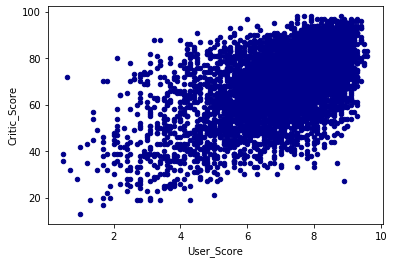

In [14]:
vgame_sales.plot.scatter(x='User_Score',
                          y='Critic_Score',
                          c='DarkBlue')

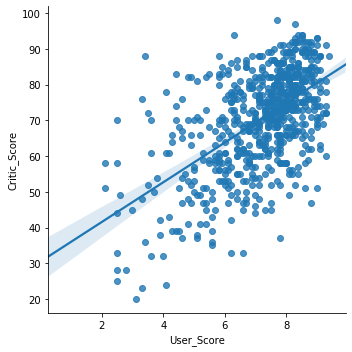

In [16]:
import seaborn as sns

sns.lmplot(x='User_Score',
           y='Critic_Score',
           data=vgame_sales.sample(frac=0.1),
           fit_reg=True) 

### Bar Chart
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html#pandas.DataFrame.plot.bar

In [179]:
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
ax = df.plot.bar(x='lab', y='val', rot=0)

Plot a whole dataframe to a bar plot. Each column is assigned a distinct color, and each row is nested in a group along the horizontal axis.

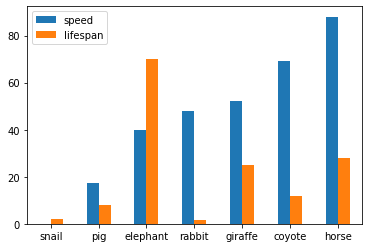

In [180]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)

#### Instead of nesting, the figure can be split by column with subplots=True. In this case, a numpy.ndarray of matplotlib.axes.Axes are returned.

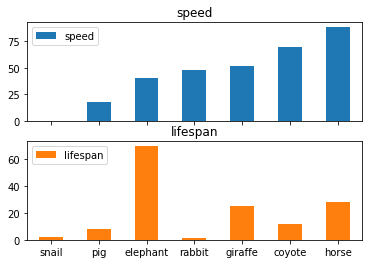

In [181]:
axes = df.plot.bar(rot=0, subplots=True)
axes[1].legend(loc=2)  # doctest: +SKIP

#### Plot a single column.

In [182]:
ax = df.plot.bar(y='speed', rot=0)

In [ ]:
Plot only selected categories for the DataFrame.

In [38]:
ax = df.plot.bar(x='lifespan', rot=0)

### Box Plots
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html#pandas.DataFrame.boxplot

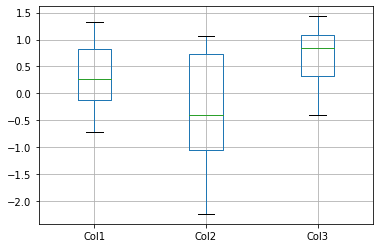

In [183]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10,4),
                   columns=['Col1', 'Col2', 'Col3', 'Col4'])
boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])

Boxplots of variables distributions grouped by the values of a 
third variable can be created using the option by. For instance:

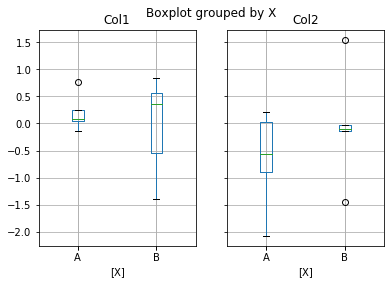

In [184]:
df = pd.DataFrame(np.random.randn(10, 2),
                  columns=['Col1', 'Col2'])
df['X'] = pd.Series(['A', 'A', 'A', 'A', 'A',
                     'B', 'B', 'B', 'B', 'B'])
boxplot = df.boxplot(by='X')

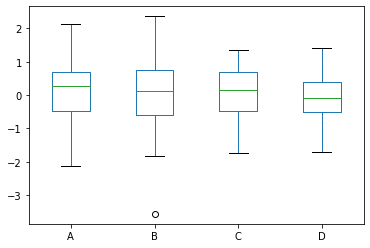

In [30]:
data = np.random.randn(25, 4)
df = pd.DataFrame(data, columns=list('ABCD'))
ax = df.plot.box()

In [185]:
### Pie Charts

In the example below we have a DataFrame with the information about planet’s mass and radius. We pass the the ‘mass’ column to the pie function to get a pie plot.

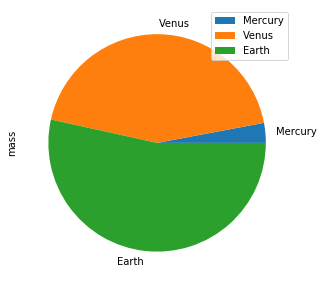

In [186]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])

plot = df.plot.pie(y='mass', figsize=(5, 5))

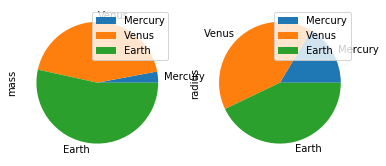

In [187]:
plot = df.plot.pie(subplots=True, figsize=(6, 3))

### Line 

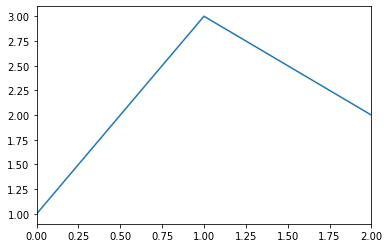

In [190]:
s = pd.Series([1, 3, 2])
s.plot.line()

The following example shows the populations 
for some animals over the years.

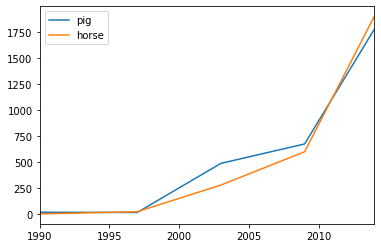

In [191]:
df = pd.DataFrame({
   'pig': [20, 18, 489, 675, 1776],
   'horse': [4, 25, 281, 600, 1900]
   }, index=[1990, 1997, 2003, 2009, 2014])
lines = df.plot.line()

numpy.ndarray

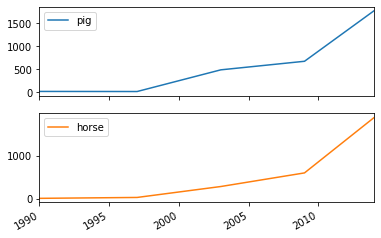

In [192]:
axes = df.plot.line(subplots=True)
type(axes)

### The following example shows the relationship between both populations.

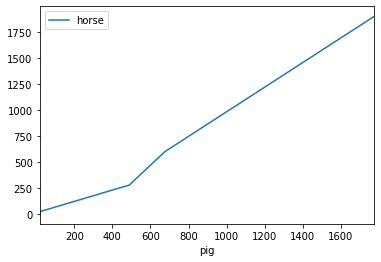

In [20]:
lines = df.plot.line(x='pig', y='horse')

### Histogram

When we draw a dice 6000 times, we expect 
to get each value around 1000 times. But 
when we draw two dices and sum the result, 
the distribution is going to be quite different. 
A histogram illustrates those distributions.

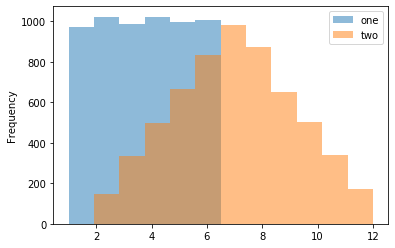

In [193]:
>>> df = pd.DataFrame(
...     np.random.randint(1, 7, 6000),
...     columns = ['one'])
>>> df['two'] = df['one'] + np.random.randint(1, 7, 6000)
>>> ax = df.plot.hist(bins=12, alpha=0.5)

This example draws a histogram based on 
the length and width of some animals, 
displayed in three bins

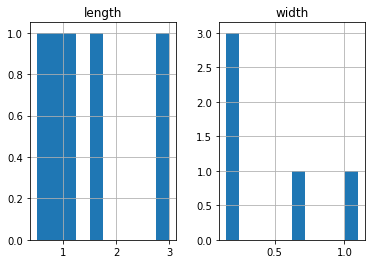

In [196]:
df = pd.DataFrame({
    'length': [1.5, 0.5, 1.2, 0.9, 3],
    'width': [0.7, 0.2, 0.15, 0.2, 1.1]
    }, index= ['pig', 'rabbit', 'duck', 'chicken', 'horse'])
hist = df.hist(bins=10)

In [ ]:
# See for tiao.io/posts/notebooks/save-matplotlib-animations-as-gifs/ more information and notes below
from matplotlib import animation, rc
from IPython.display import HTML, Image

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20, blit=True)

anim.save('animation.gif', writer='imagemagick', fps=60)

![SegmentLocal](animation.gif "title")

In [15]:
import statsmodels.api as sm # import statsmodels 

X = df["RM"] ## X usually means our input variables (or independent variables)
y = target["MEDV"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

ModuleNotFoundError: No module named 'statsmodels'